In [110]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8


In [111]:
concrete_data= pd.read_csv('Concrete_Data_Yeh.csv')

print(concrete_data)

      cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0      540.0    0.0     0.0  162.0               2.5           1040.0   
1      540.0    0.0     0.0  162.0               2.5           1055.0   
2      332.5  142.5     0.0  228.0               0.0            932.0   
3      332.5  142.5     0.0  228.0               0.0            932.0   
4      198.6  132.4     0.0  192.0               0.0            978.4   
...      ...    ...     ...    ...               ...              ...   
1025   276.4  116.0    90.3  179.6               8.9            870.1   
1026   322.2    0.0   115.6  196.0              10.4            817.9   
1027   148.5  139.4   108.6  192.7               6.1            892.4   
1028   159.1  186.7     0.0  175.6              11.3            989.6   
1029   260.9  100.5    78.3  200.6               8.6            864.5   

      fineaggregate  age  csMPa  
0             676.0   28  79.99  
1             676.0   28  61.89  
2             594.0  

In [112]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [113]:
concrete_data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [114]:
concrete_data.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [115]:
np.isnan(concrete_data).sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

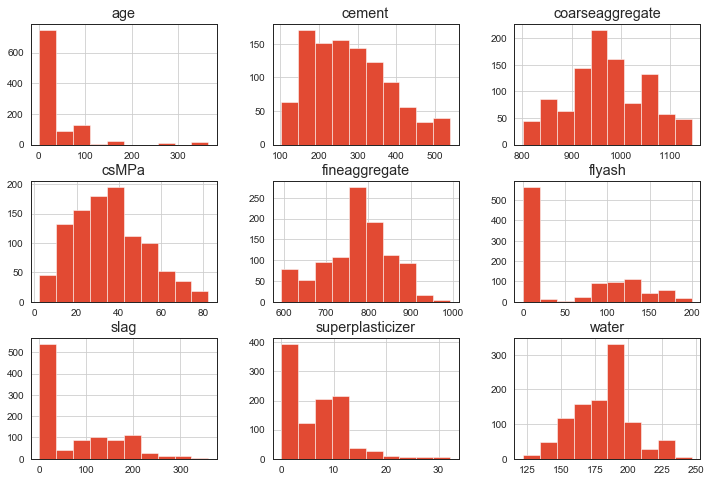

In [116]:
concrete_data.hist()
plt.show()

In [117]:
cor = concrete_data.corr()
print(cor)

                    cement      slag    flyash     water  superplasticizer  \
cement            1.000000 -0.275216 -0.397467 -0.081587          0.092386   
slag             -0.275216  1.000000 -0.323580  0.107252          0.043270   
flyash           -0.397467 -0.323580  1.000000 -0.256984          0.377503   
water            -0.081587  0.107252 -0.256984  1.000000         -0.657533   
superplasticizer  0.092386  0.043270  0.377503 -0.657533          1.000000   
coarseaggregate  -0.109349 -0.283999 -0.009961 -0.182294         -0.265999   
fineaggregate    -0.222718 -0.281603  0.079108 -0.450661          0.222691   
age               0.081946 -0.044246 -0.154371  0.277618         -0.192700   
csMPa             0.497832  0.134829 -0.105755 -0.289633          0.366079   

                  coarseaggregate  fineaggregate       age     csMPa  
cement                  -0.109349      -0.222718  0.081946  0.497832  
slag                    -0.283999      -0.281603 -0.044246  0.134829  
flyash

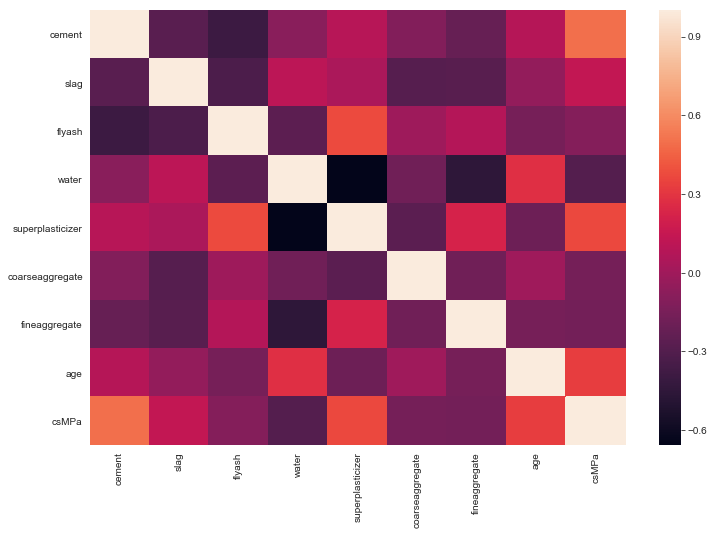

In [118]:
sns.heatmap(cor)

In [119]:
X = concrete_data.iloc[:,0:8].values
Y = concrete_data.iloc[:,8].values


# Using Test/Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [120]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [121]:

#import tensorflow as tf
##tf.disable_v2_behavior()
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasRegressor
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline

In [122]:

#def baseline_model():
#    # create model
#    model = Sequential()
#    model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
#    model.add(Dense(1, kernel_initializer='normal'))
#    # Compile model
#    model.compile(loss='mean_squared_error', optimizer='adam')
#    return model
## evaluate model
#estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
#kfold = KFold(n_splits=10)
#results = cross_val_score(estimator, X_train,y_train, cv=kfold)
#print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [123]:
#y_predict = model.predict(X_test)
#
#from sklearn.metrics import r2_score
#print(r2_score(y_test,y_predict))
#
#backend.sqrt(backend.mean(backend.square(y_test - y_predict), axis=-1))

In [124]:

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras import backend


model=Sequential()

model.add(Dense(64,input_dim=8,activation = 'relu'))

# Bulding Second and third layer
model.add(Dense(32,activation='relu'))
model.add(keras.layers.normalization.BatchNormalization())

# Output Layer
model.add(Dense(1,activation='linear'))


opt =keras.optimizers.Adam(lr=0.0015)

model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse', 'mae'])
history = model.fit(X_train, y_train, epochs = 35 , batch_size=32, validation_split=0.1)

print(model.summary())

Train on 648 samples, validate on 73 samples
Epoch 1/35
648/648 [==============================] - 1s 930us/step - loss: 1556.2454 - mse: 1556.2454 - mae: 35.8434 - val_loss: 1404.8538 - val_mse: 1404.8538 - val_mae: 33.9922
Epoch 2/35
648/648 [==============================] - 0s 76us/step - loss: 1492.5684 - mse: 1492.5685 - mae: 35.6138 - val_loss: 1373.0407 - val_mse: 1373.0408 - val_mae: 33.7469
Epoch 3/35
648/648 [==============================] - 0s 76us/step - loss: 1430.3815 - mse: 1430.3816 - mae: 35.3044 - val_loss: 1350.2318 - val_mse: 1350.2318 - val_mae: 33.7497
Epoch 4/35
648/648 [==============================] - 0s 69us/step - loss: 1365.7823 - mse: 1365.7823 - mae: 34.8878 - val_loss: 1341.9963 - val_mse: 1341.9962 - val_mae: 33.9837
Epoch 5/35
648/648 [==============================] - 0s 77us/step - loss: 1298.6355 - mse: 1298.6355 - mae: 34.3585 - val_loss: 1317.4363 - val_mse: 1317.4362 - val_mae: 33.9601
Epoch 6/35
648/648 [==============================] - 0s 76

In [125]:
y_predict = model.predict(X_test)

from sklearn import metrics
from sklearn.metrics import r2_score

print(r2_score(y_test, y_predict, multioutput='variance_weighted'))

print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))


0.8849250936730071
MAE: 3.8921535136398764
MSE: 30.47199774530652
RMSE: 5.520144721409623
